In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import DenseNet201

from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers, Sequential
from keras.layers.normalization import BatchNormalization
from keras.models import Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
batch_size = 64

In [ ]:
# rescale normalizes the data for the images.
# Data is split into train and validation sets
image_data_gen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    validation_split=0.2)

train_it = image_data_gen.flow_from_directory(directory='/content/drive/MyDrive/TB_Chest_Radiography_Database',
                                              target_size=(224, 224),
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              subset='training'
                                             )

val_it = image_data_gen.flow_from_directory(directory='/content/drive/MyDrive/TB_Chest_Radiography_Database',
                                              target_size=(224, 224),
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              subset='validation'
                                             )

Found 5440 images belonging to 2 classes.
Found 1360 images belonging to 2 classes.


In [ ]:
dnn201 = tf.keras.applications.DenseNet201(
    include_top=False,
    input_tensor=None,
    input_shape=(224,224,3),
    weights = 'imagenet'
)

dnn201.trainable= False

global_avg_layer = tf.keras.layers.GlobalAveragePooling2D()
predictions = Dense(2, activation='sigmoid')

model = Sequential([
    dnn201,
    global_avg_layer,
    
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
  
    BatchNormalization(),
    Dropout(0.5),
    
    predictions
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

74842112/74836368 [==============================] - 21s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Functional)     (None, 7, 7, 1920)        18321984  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1920)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1920)              7680      
_________________________________________________________________
dropout (Dropout)            (None, 1920)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1967104   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
________________________________________________________

In [ ]:
epochs = 15
model_hist = model.fit(train_it,
                       validation_data=val_it,
                       epochs=epochs, )
model.save('/content/drive/MyDrive/denseNet201.h5')

Epoch 1/15
85/85 [==============================] - 2639s 31s/step - loss: 0.4636 - accuracy: 0.8526 - val_loss: 0.1878 - val_accuracy: 0.9368
Epoch 2/15
85/85 [==============================] - 155s 2s/step - loss: 0.1913 - accuracy: 0.9326 - val_loss: 0.1491 - val_accuracy: 0.9412
Epoch 3/15
85/85 [==============================] - 154s 2s/step - loss: 0.1568 - accuracy: 0.9397 - val_loss: 0.1012 - val_accuracy: 0.9684
Epoch 4/15
85/85 [==============================] - 154s 2s/step - loss: 0.1138 - accuracy: 0.9549 - val_loss: 0.0771 - val_accuracy: 0.9779
Epoch 5/15
85/85 [==============================] - 153s 2s/step - loss: 0.1170 - accuracy: 0.9518 - val_loss: 0.0792 - val_accuracy: 0.9735
Epoch 6/15
85/85 [==============================] - 153s 2s/step - loss: 0.1012 - accuracy: 0.9626 - val_loss: 0.0959 - val_accuracy: 0.9647
Epoch 7/15
85/85 [==============================] - 156s 2s/step - loss: 0.0940 - accuracy: 0.9633 - val_loss: 0.0531 - val_accuracy: 0.9794
Epoch 8/15


In [ ]:
results = model.evaluate(val_it)

22/22 [==============================] - 30s 1s/step - loss: 0.0509 - accuracy: 0.9846


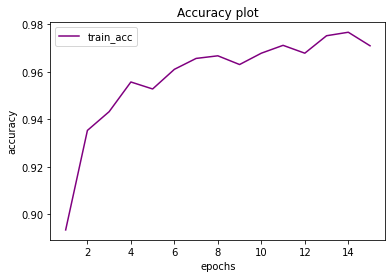

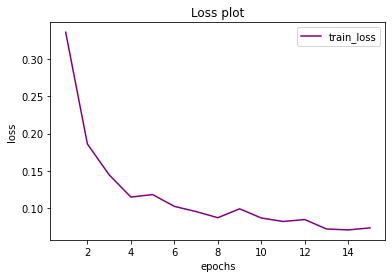

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
%matplotlib inline

epochs= range(1, len(model_hist.history["accuracy"])+1)

plt.plot(epochs, model_hist.history["accuracy"], color="purple")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc", "val_acc"])
plt.show()

plt.plot(epochs, model_hist.history["loss"], color="purple")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss", "val_loss"])
plt.show()